In [2]:
import pandas as pd
df=pd.read_csv('mydataset.csv')

In [3]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg car-price  
0          27     13495  
1          27     16500  
2          26     16500  
3          30     13950  
4          22     17450  

[5 rows x 26 columns]

In [25]:
cat_dset=df[['horsepower','curb-weight','engine-size','highway-mpg','car-price']]

In [5]:
cat_dset.head()

horsepower  curb-weight  engine-size  highway-mpg car-price
0        111         2548          130           27     13495
1        111         2548          130           27     16500
2        154         2823          152           26     16500
3        102         2337          109           30     13950
4        115         2824          136           22     17450

In [6]:
cat_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   horsepower   205 non-null    object
 1   curb-weight  205 non-null    int64 
 2   engine-size  205 non-null    int64 
 3   highway-mpg  205 non-null    int64 
 4   car-price    205 non-null    object
dtypes: int64(3), object(2)
memory usage: 8.1+ KB


In [7]:
cat_dset.dtypes

horsepower     object
curb-weight     int64
engine-size     int64
highway-mpg     int64
car-price      object
dtype: object

In [8]:
import numpy as np

In [9]:
cat_dset=cat_dset.replace("?",np.nan)
cat_dset["car-price"]=pd.to_numeric(cat_dset["car-price"], errors="coerce")
cat_dset["horsepower"]=pd.to_numeric(cat_dset["horsepower"], errors="coerce")
cat_dset["horsepower"].fillna(cat_dset["horsepower"].mean(), inplace=True)
cat_dset["car-price"].fillna(cat_dset["car-price"].mean(), inplace=True)

C:\Users\hom\AppData\Local\Temp\ipykernel_4648\4137988704.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_dset["horsepower"].fillna(cat_dset["horsepower"].mean(), inplace=True)
C:\Users\hom\AppData\Local\Temp\ipykernel_4648\4137988704.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [10]:
#x=cat_dset.drop(columns=['car-price']).values
#y=cat_dset['car-price'].values


In [11]:
x=cat_dset.iloc[:,:-1].values
y=cat_dset.iloc[:,-1].values

In [12]:
cat_dset.isnull().sum()

horsepower     0
curb-weight    0
engine-size    0
highway-mpg    0
car-price      0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sbn

<Axes: >

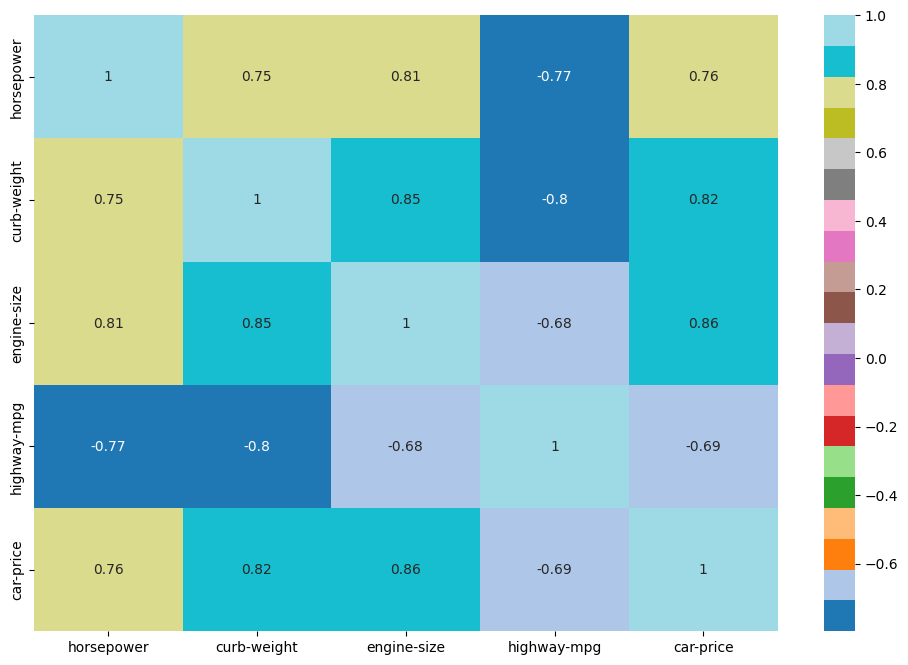

In [14]:
corr=cat_dset.corr()
plt.figure(figsize=(12,8))
sbn.heatmap(corr,annot=True,cmap='tab20')

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=lm.predict(x_test)

In [18]:
from sklearn.metrics import*
mse=mean_squared_error(y_test,y_pred)
print(mse)

17179663.10731812


In [19]:
r2=r2_score(y_test,y_pred)
print(r2)

0.7796690294976713


In [20]:
from joblib import dump

In [22]:
dump(lm,'24RP14364')

['24RP14364']